# Introduction to Data Analysis and GIS Using Python
**Analyzing NYC Subway Entrances at Risk from Another Hurricane Sandy**  

Mark Bauer

# Goal
In this notebook, we'll walk through a typical data analysis workflow using Python. Specifically, we'll focus on common Geographic Information Systems (GIS) tasks like reading in shapefiles, mapping, attribute and spatial joins, etc. We'll conclude with analyzing NYC subway entrances that were within 10 feet of Hurricane Sandy.

# Datasets

[Subway Entrances](https://data.cityofnewyork.us/Transportation/Subway-Entrances/drex-xx56) Map of NYC Subway Entrances.  

[Sandy Inundation Zone](https://data.cityofnewyork.us/Environment/Sandy-Inundation-Zone/uyj8-7rv5) Areas of New York City that were flooded as a result of Hurricane Sandy.

[Borough Boundaries](https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm) GIS data: Boundaries of Boroughs (water areas excluded)..

# Main Python Libraries
[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

[GeoPandas](https://geopandas.org/index.html) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

[Matplotlib](https://matplotlib.org/3.1.1/index.html#) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Table of Contents
=================

   * [1. Reading in data](#1-Reading-in-data])
   
       
   * [2. Inspection](#2-Inspection)
   
       
   * [3. Summary statistics](#3-Summary-statistics)
   
   
   * [4. Identifying null values](#4-Identifying-null-values)
   
 
   * [5. Selecting rows & columns](#5-Selecting-rows-&-columns)
 
 
   * [6. Filtering](#6-Filtering)
          
          
   * [7. Data visualization](#7-Data-visualization)
          
          
   * [8. Mapping](#8-Mapping)
   
 

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# 1. Reading in Data

In [2]:
path = 'https://data.cityofnewyork.us/api/geospatial/drex-xx56?method=export&format=Shapefile'
subway_gdf = gpd.read_file(path)

subway_gdf.head()

,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734.0,http://web.mta.info/nyct/service/,POINT (-73.86836 40.84917)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735.0,http://web.mta.info/nyct/service/,POINT (-73.86821 40.84913)
2,2-5,Morris Park Ave & 180th St at NW corner,1736.0,http://web.mta.info/nyct/service/,POINT (-73.87350 40.84122)
3,2-5,Morris Park Ave & 180th St at NW corner,1737.0,http://web.mta.info/nyct/service/,POINT (-73.87289 40.84145)
4,2-5,Boston Rd & 178th St at SW corner,1738.0,http://web.mta.info/nyct/service/,POINT (-73.87962 40.84082)


# 2. Data Inspection

In [3]:
subway_gdf.head()

,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734.0,http://web.mta.info/nyct/service/,POINT (-73.86836 40.84917)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735.0,http://web.mta.info/nyct/service/,POINT (-73.86821 40.84913)
2,2-5,Morris Park Ave & 180th St at NW corner,1736.0,http://web.mta.info/nyct/service/,POINT (-73.87350 40.84122)
3,2-5,Morris Park Ave & 180th St at NW corner,1737.0,http://web.mta.info/nyct/service/,POINT (-73.87289 40.84145)
4,2-5,Boston Rd & 178th St at SW corner,1738.0,http://web.mta.info/nyct/service/,POINT (-73.87962 40.84082)


In [4]:
subway_gdf.tail()

,line,name,objectid,url,geometry
1923,Q,2nd Ave & bet 83rd & 84th St,1928.0,http://web.mta.info/nyct/service/,POINT (-73.95281 40.77619)
1924,Q,2nd Ave & 96th St at SW corner,1929.0,http://web.mta.info/nyct/service/,POINT (-73.94747 40.78410)
1925,Q,2nd Ave & 95th St at NW corner,1930.0,http://web.mta.info/nyct/service/,POINT (-73.94762 40.78392)
1926,Q,2nd Ave & 94th St at NE corner,1931.0,http://web.mta.info/nyct/service/,POINT (-73.94773 40.78292)
1927,Q,2nd Ave & 94th St at SW corner,1932.0,http://web.mta.info/nyct/service/,POINT (-73.94824 40.78297)


In [5]:
subway_gdf.shape

(1928, 5)

In [6]:
print('type of the geopandas object: {}'.format(type(subway_gdf)))
print('type of the geopandas geometry column object: {}'.format(type(subway_gdf['geometry'])))
print('type of the geopandas regular column object: {}'.format(type(subway_gdf['objectid'])))

type of the geopandas object: <class 'geopandas.geodataframe.GeoDataFrame'>
type of the geopandas geometry column object: <class 'geopandas.geoseries.GeoSeries'>
type of the geopandas regular column object: <class 'pandas.core.series.Series'>


In [7]:
subway_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   line      1928 non-null   object  
 1   name      1899 non-null   object  
 2   objectid  1928 non-null   float64 
 3   url       1928 non-null   object  
 4   geometry  1928 non-null   geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 75.4+ KB


In [8]:
subway_gdf.describe()

,objectid
count,1928.000000
mean,964.524896
std,556.752930
min,1.000000
25%,482.750000
50%,964.500000
75%,1446.250000
max,1932.000000


In [9]:
subway_gdf.describe(include=['O'])

,line,name,url
count,1928,1899,1928
unique,97,1597,1
top,F,River Ave & 161st St at SW corner,http://web.mta.info/nyct/service/
freq,125,7,1928


In [10]:
subway_gdf.isnull().sum()

line         0
name        29
objectid     0
url          0
geometry     0
dtype: int64

In [11]:
subway_gdf['objectid'].is_unique

True

# Geographic Data Inspection

In [12]:
subway_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

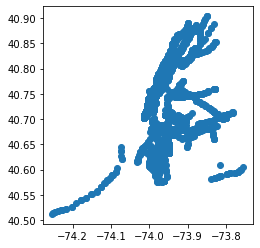

In [13]:
subway_gdf.plot()

In [14]:
subway_gdf.geometry.name

'geometry'

In [15]:
subway_gdf.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1923    Point
1924    Point
1925    Point
1926    Point
1927    Point
Length: 1928, dtype: object

In [16]:
subway_gdf.geom_type.value_counts()

Point    1928
dtype: int64

In [17]:
subway_gdf.bounds

,minx,miny,maxx,maxy
0,-73.868356,40.849169,-73.868356,40.849169
1,-73.868213,40.849128,-73.868213,40.849128
2,-73.873499,40.841223,-73.873499,40.841223
3,-73.872892,40.841453,-73.872892,40.841453
4,-73.879623,40.840815,-73.879623,40.840815
...,...,...,...,...
1923,-73.952814,40.776188,-73.952814,40.776188
1924,-73.947473,40.784099,-73.947473,40.784099
1925,-73.947619,40.783916,-73.947619,40.783916
1926,-73.947729,40.782924,-73.947729,40.782924


In [18]:
subway_gdf.total_bounds

array([-74.25283252,  40.51211371, -73.754178  ,  40.903597  ])

# 3. Data Wrangling

In [19]:
subway_gdf.head()

,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734.0,http://web.mta.info/nyct/service/,POINT (-73.86836 40.84917)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735.0,http://web.mta.info/nyct/service/,POINT (-73.86821 40.84913)
2,2-5,Morris Park Ave & 180th St at NW corner,1736.0,http://web.mta.info/nyct/service/,POINT (-73.87350 40.84122)
3,2-5,Morris Park Ave & 180th St at NW corner,1737.0,http://web.mta.info/nyct/service/,POINT (-73.87289 40.84145)
4,2-5,Boston Rd & 178th St at SW corner,1738.0,http://web.mta.info/nyct/service/,POINT (-73.87962 40.84082)


In [20]:
subway_gdf.iloc[0]

line                                                 2-5
name             Birchall Ave & Sagamore St at NW corner
objectid                                          1734.0
url                    http://web.mta.info/nyct/service/
geometry    POINT (-73.86835600032798 40.84916900104506)
Name: 0, dtype: object

In [21]:
subway_gdf.iloc[0, :]

line                                                 2-5
name             Birchall Ave & Sagamore St at NW corner
objectid                                          1734.0
url                    http://web.mta.info/nyct/service/
geometry    POINT (-73.86835600032798 40.84916900104506)
Name: 0, dtype: object

In [22]:
subway_gdf.iloc[:5, :]

,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734.0,http://web.mta.info/nyct/service/,POINT (-73.86836 40.84917)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735.0,http://web.mta.info/nyct/service/,POINT (-73.86821 40.84913)
2,2-5,Morris Park Ave & 180th St at NW corner,1736.0,http://web.mta.info/nyct/service/,POINT (-73.87350 40.84122)
3,2-5,Morris Park Ave & 180th St at NW corner,1737.0,http://web.mta.info/nyct/service/,POINT (-73.87289 40.84145)
4,2-5,Boston Rd & 178th St at SW corner,1738.0,http://web.mta.info/nyct/service/,POINT (-73.87962 40.84082)


In [23]:
subway_gdf.iloc[:5, -3:]

,objectid,url,geometry
0,1734.0,http://web.mta.info/nyct/service/,POINT (-73.86836 40.84917)
1,1735.0,http://web.mta.info/nyct/service/,POINT (-73.86821 40.84913)
2,1736.0,http://web.mta.info/nyct/service/,POINT (-73.87350 40.84122)
3,1737.0,http://web.mta.info/nyct/service/,POINT (-73.87289 40.84145)
4,1738.0,http://web.mta.info/nyct/service/,POINT (-73.87962 40.84082)


In [24]:
subway_gdf.loc[:5, ['objectid', 'name']]

,objectid,name
0,1734.0,Birchall Ave & Sagamore St at NW corner
1,1735.0,Birchall Ave & Sagamore St at NE corner
2,1736.0,Morris Park Ave & 180th St at NW corner
3,1737.0,Morris Park Ave & 180th St at NW corner
4,1738.0,Boston Rd & 178th St at SW corner
5,1739.0,Boston Rd & E Tremont Ave at NW corner


In [25]:
subway_gdf.loc[subway_gdf['objectid'] > 1750]

,line,name,objectid,url,geometry
17,2-5,Intervale Ave & Westchester Ave at NE corner,1751.0,http://web.mta.info/nyct/service/,POINT (-73.89672 40.82245)
18,2-5,Intervale Ave & Westchester Ave at SE corner,1752.0,http://web.mta.info/nyct/service/,POINT (-73.89668 40.82210)
19,2-5,Westchester & 160th St at SW corner,1753.0,http://web.mta.info/nyct/service/,POINT (-73.90196 40.81958)
20,2-5,Prospect Ave & 160th St at NW corner,1754.0,http://web.mta.info/nyct/service/,POINT (-73.90167 40.81989)
21,2-5,Jackson Ave & 152nd St at NE corner,1755.0,http://web.mta.info/nyct/service/,POINT (-73.90794 40.81620)
...,...,...,...,...,...
1923,Q,2nd Ave & bet 83rd & 84th St,1928.0,http://web.mta.info/nyct/service/,POINT (-73.95281 40.77619)
1924,Q,2nd Ave & 96th St at SW corner,1929.0,http://web.mta.info/nyct/service/,POINT (-73.94747 40.78410)
1925,Q,2nd Ave & 95th St at NW corner,1930.0,http://web.mta.info/nyct/service/,POINT (-73.94762 40.78392)
1926,Q,2nd Ave & 94th St at NE corner,1931.0,http://web.mta.info/nyct/service/,POINT (-73.94773 40.78292)


In [26]:
subway_gdf.loc[subway_gdf['line'] == 'Q']

,line,name,objectid,url,geometry
153,Q,Ocean Pkwy & Brighton Beach Rd at NE corner,9.0,http://web.mta.info/nyct/service/,POINT (-73.96789 40.57642)
154,Q,Ocean Pkwy & Brighton Beach Rd at NE corner,10.0,http://web.mta.info/nyct/service/,POINT (-73.96759 40.57645)
155,Q,Ocean Pkwy & Brighton Beach Rd at SE corner,11.0,http://web.mta.info/nyct/service/,POINT (-73.96788 40.57621)
156,Q,Ocean Pkwy & Brighton Beach Rd at SE corner,12.0,http://web.mta.info/nyct/service/,POINT (-73.96756 40.57623)
432,Q,Ocean Pkwy & Brighton Beach Rd at NW corner,288.0,http://web.mta.info/nyct/service/,POINT (-73.96944 40.57651)
433,Q,Ocean Pkwy & Brighton Beach Rd at NW corner,289.0,http://web.mta.info/nyct/service/,POINT (-73.96924 40.57649)
1916,Q,2nd Ave & 72nd St at NW corner,1921.0,http://web.mta.info/nyct/service/,POINT (-73.95857 40.76899)
1917,Q,2nd Ave & 72nd St at SE corner,1922.0,http://web.mta.info/nyct/service/,POINT (-73.95829 40.76869)
1918,Q,2nd Ave & 69th St at SE corner,1923.0,http://web.mta.info/nyct/service/,POINT (-73.95947 40.76704)
1919,Q,2nd Ave & 69th St at SE corner,1924.0,http://web.mta.info/nyct/service/,POINT (-73.95959 40.76688)


<AxesSubplot:>

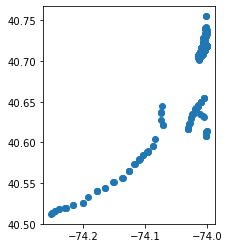

In [27]:
subway_gdf.cx[:-74.00, :].plot()

<AxesSubplot:>

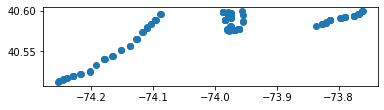

In [28]:
subway_gdf.cx[:, :40.60].plot()

In [29]:
subway_gdf['geometry'].x

0      -73.868356
1      -73.868213
2      -73.873499
3      -73.872892
4      -73.879623
          ...    
1923   -73.952814
1924   -73.947473
1925   -73.947619
1926   -73.947729
1927   -73.948238
Length: 1928, dtype: float64

In [30]:
subway_gdf['geometry'].y

0       40.849169
1       40.849128
2       40.841223
3       40.841453
4       40.840815
          ...    
1923    40.776188
1924    40.784099
1925    40.783916
1926    40.782924
1927    40.782967
Length: 1928, dtype: float64

In [31]:
subway_gdf['latitude'] = subway_gdf['geometry'].y
subway_gdf['longitude'] = subway_gdf['geometry'].x

subway_gdf.head()

,line,name,objectid,url,geometry,latitude,longitude
0,2-5,Birchall Ave & Sagamore St at NW corner,1734.0,http://web.mta.info/nyct/service/,POINT (-73.86836 40.84917),40.849169,-73.868356
1,2-5,Birchall Ave & Sagamore St at NE corner,1735.0,http://web.mta.info/nyct/service/,POINT (-73.86821 40.84913),40.849128,-73.868213
2,2-5,Morris Park Ave & 180th St at NW corner,1736.0,http://web.mta.info/nyct/service/,POINT (-73.87350 40.84122),40.841223,-73.873499
3,2-5,Morris Park Ave & 180th St at NW corner,1737.0,http://web.mta.info/nyct/service/,POINT (-73.87289 40.84145),40.841453,-73.872892
4,2-5,Boston Rd & 178th St at SW corner,1738.0,http://web.mta.info/nyct/service/,POINT (-73.87962 40.84082),40.840815,-73.879623


In [32]:
subway_sample = subway_gdf.loc[:, ['objectid', 'latitude', 'longitude']]

print(type(subway_sample))
subway_sample.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,objectid,latitude,longitude
0,1734.0,40.849169,-73.868356
1,1735.0,40.849128,-73.868213
2,1736.0,40.841223,-73.873499
3,1737.0,40.841453,-73.872892
4,1738.0,40.840815,-73.879623


# Create Geometry from Coordinates

In [33]:
gdf = gpd.GeoDataFrame(subway_sample, 
                       geometry=gpd.points_from_xy(subway_sample['longitude'], 
                                                   subway_sample['latitude']), 
                       crs=4326)

gdf.head()

,objectid,latitude,longitude,geometry
0,1734.0,40.849169,-73.868356,POINT (-73.86836 40.84917)
1,1735.0,40.849128,-73.868213,POINT (-73.86821 40.84913)
2,1736.0,40.841223,-73.873499,POINT (-73.87350 40.84122)
3,1737.0,40.841453,-73.872892,POINT (-73.87289 40.84145)
4,1738.0,40.840815,-73.879623,POINT (-73.87962 40.84082)


<AxesSubplot:>

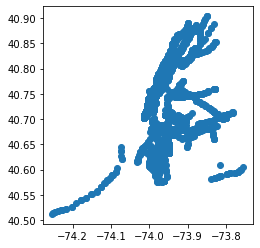

In [34]:
gdf.plot()

In [35]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
# Borough Boundaries for Aesthetics
path = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'
nyc_bb = gpd.read_file(path)

nyc_bb.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,4.0,Queens,3.040206e+09,900269.280485,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
1,3.0,Brooklyn,1.934167e+09,728477.954082,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
2,5.0,Staten Island,1.623631e+09,325924.002076,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
3,1.0,Manhattan,6.366208e+08,359993.126318,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2.0,Bronx,1.187194e+09,463868.599917,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [37]:
nyc_bb.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

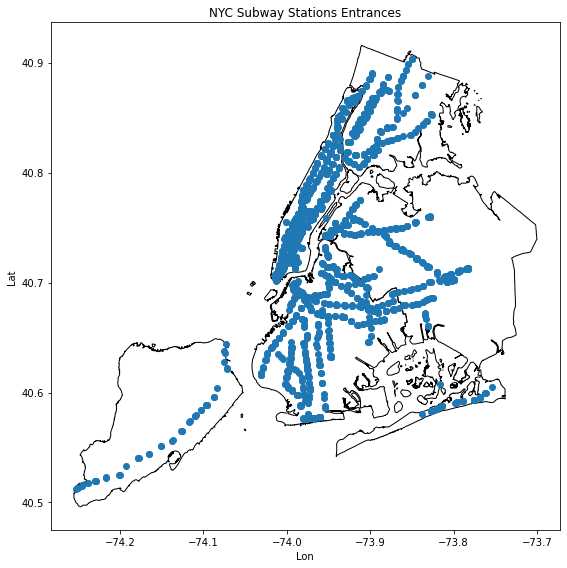

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))
    
subway_gdf.plot(ax=ax)
nyc_bb.plot(ax=ax, 
            facecolor='None', 
            edgecolor='black', 
            zorder=0)

plt.title('NYC Subway Stations Entrances')
plt.xlabel('Lon')
plt.ylabel('Lat')

plt.tight_layout()

# Spatial Join

In [39]:
subway_merged = gpd.sjoin(subway_gdf, 
                          nyc_bb, 
                          how="left", 
                          op='within')

subway_merged.head()

,line,name,objectid,url,geometry,latitude,longitude,index_right,boro_code,boro_name,shape_area,shape_leng
0,2-5,Birchall Ave & Sagamore St at NW corner,1734.0,http://web.mta.info/nyct/service/,POINT (-73.86836 40.84917),40.849169,-73.868356,4,2.0,Bronx,1.187194e+09,463868.599917
1,2-5,Birchall Ave & Sagamore St at NE corner,1735.0,http://web.mta.info/nyct/service/,POINT (-73.86821 40.84913),40.849128,-73.868213,4,2.0,Bronx,1.187194e+09,463868.599917
2,2-5,Morris Park Ave & 180th St at NW corner,1736.0,http://web.mta.info/nyct/service/,POINT (-73.87350 40.84122),40.841223,-73.873499,4,2.0,Bronx,1.187194e+09,463868.599917
3,2-5,Morris Park Ave & 180th St at NW corner,1737.0,http://web.mta.info/nyct/service/,POINT (-73.87289 40.84145),40.841453,-73.872892,4,2.0,Bronx,1.187194e+09,463868.599917
4,2-5,Boston Rd & 178th St at SW corner,1738.0,http://web.mta.info/nyct/service/,POINT (-73.87962 40.84082),40.840815,-73.879623,4,2.0,Bronx,1.187194e+09,463868.599917


In [40]:
subway_merged['objectid'].is_unique

True

In [41]:
subway_merged.groupby(by='boro_name')['objectid'].count()

boro_name
Bronx            238
Brooklyn         542
Manhattan        775
Queens           325
Staten Island     48
Name: objectid, dtype: int64

In [42]:
grouped = subway_merged.groupby(by='boro_name')['objectid'].count()
grouped = grouped.reset_index()

grouped = grouped.rename(columns={'objectid':'count'})

grouped

,boro_name,count
0,Bronx,238
1,Brooklyn,542
2,Manhattan,775
3,Queens,325
4,Staten Island,48


# Attribute Join

In [43]:
nyc_bb_counts = nyc_bb.merge(grouped, 
                             on='boro_name')

nyc_bb_counts.head()

,boro_code,boro_name,shape_area,shape_leng,geometry,count
0,4.0,Queens,3.040206e+09,900269.280485,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",325
1,3.0,Brooklyn,1.934167e+09,728477.954082,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",542
2,5.0,Staten Island,1.623631e+09,325924.002076,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48
3,1.0,Manhattan,6.366208e+08,359993.126318,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",775
4,2.0,Bronx,1.187194e+09,463868.599917,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",238


In [44]:
nyc_bb_counts['count_sqmi'] = round(nyc_bb_counts['count'] / (nyc_bb_counts['shape_area'] / 27878400), 2)

nyc_bb_counts.head()

,boro_code,boro_name,shape_area,shape_leng,geometry,count,count_sqmi
0,4.0,Queens,3.040206e+09,900269.280485,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",325,2.98
1,3.0,Brooklyn,1.934167e+09,728477.954082,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",542,7.81
2,5.0,Staten Island,1.623631e+09,325924.002076,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48,0.82
3,1.0,Manhattan,6.366208e+08,359993.126318,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",775,33.94
4,2.0,Bronx,1.187194e+09,463868.599917,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",238,5.59


# 4. Mapping

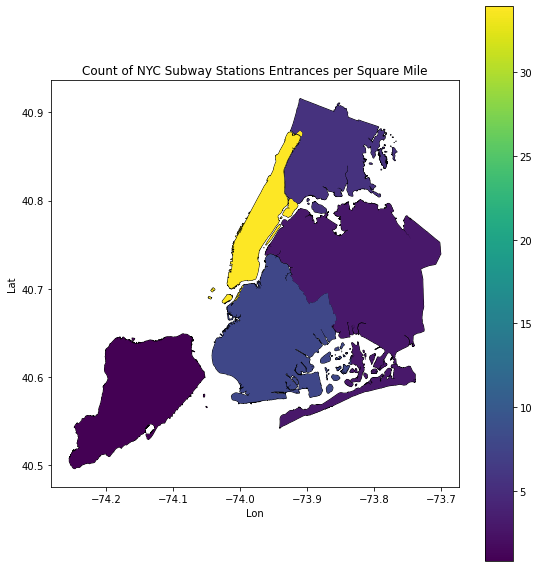

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))
    
nyc_bb_counts.plot(column='count_sqmi', 
                   legend=True,
                   ax=ax)
nyc_bb.plot(ax=ax, 
            facecolor='None', 
            edgecolor='black', 
            zorder=0)

plt.title('Count of NYC Subway Stations Entrances per Square Mile')
plt.xlabel('Lon')
plt.ylabel('Lat')

plt.tight_layout()

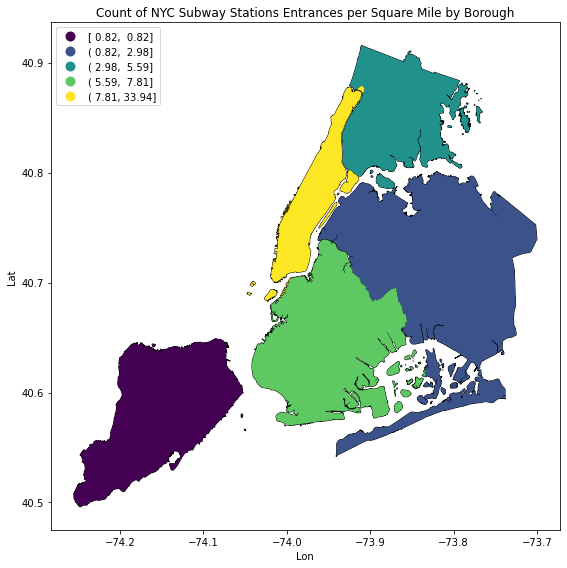

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
    
nyc_bb_counts.plot(column='count_sqmi', 
                   scheme='naturalbreaks',
                   legend=True,
                   legend_kwds={'loc': 'upper left'},
                   ax=ax)
nyc_bb.plot(ax=ax, 
            facecolor='None', 
            edgecolor='black', 
            zorder=0)


plt.title('Count of NYC Subway Stations Entrances per Square Mile by Borough')
plt.xlabel('Lon')
plt.ylabel('Lat')

plt.tight_layout()

# Converting GeoDataFrame to DataFrame

In [47]:
print(type(nyc_bb_counts))

counts_df = pd.DataFrame(nyc_bb_counts)
print(type(counts_df))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.frame.DataFrame'>


# Plotting

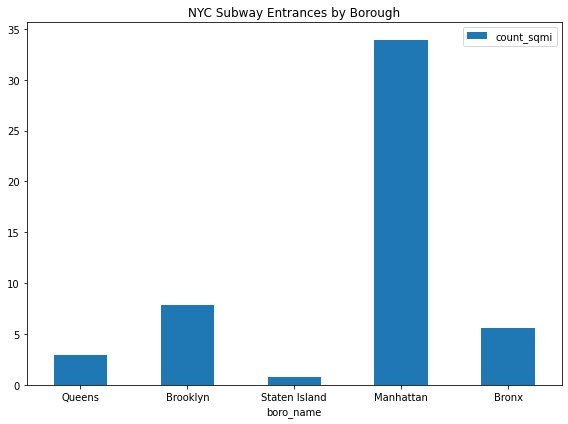

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))

counts_df.plot.bar(x='boro_name', 
                   y='count_sqmi', 
                   rot=0, 
                   ax=ax)

plt.title('NYC Subway Entrances by Borough')
plt.tight_layout()

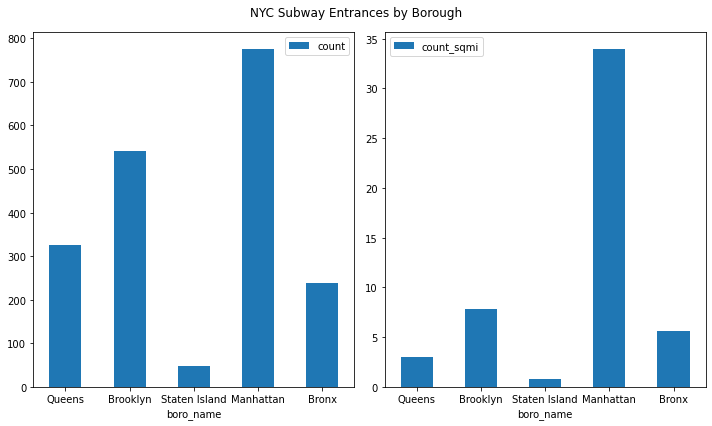

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

counts_df.plot.bar(x='boro_name', 
                   y='count', 
                   rot=0, 
                   ax=axs[0])

counts_df.plot.bar(x='boro_name', 
                   y='count_sqmi', 
                   rot=0, 
                   ax=axs[1])

plt.suptitle('NYC Subway Entrances by Borough')
plt.tight_layout()

# 5. Case Study: Sandy Inundation Layer

In [50]:
subway_gdf.head()

,line,name,objectid,url,geometry,latitude,longitude
0,2-5,Birchall Ave & Sagamore St at NW corner,1734.0,http://web.mta.info/nyct/service/,POINT (-73.86836 40.84917),40.849169,-73.868356
1,2-5,Birchall Ave & Sagamore St at NE corner,1735.0,http://web.mta.info/nyct/service/,POINT (-73.86821 40.84913),40.849128,-73.868213
2,2-5,Morris Park Ave & 180th St at NW corner,1736.0,http://web.mta.info/nyct/service/,POINT (-73.87350 40.84122),40.841223,-73.873499
3,2-5,Morris Park Ave & 180th St at NW corner,1737.0,http://web.mta.info/nyct/service/,POINT (-73.87289 40.84145),40.841453,-73.872892
4,2-5,Boston Rd & 178th St at SW corner,1738.0,http://web.mta.info/nyct/service/,POINT (-73.87962 40.84082),40.840815,-73.879623


In [51]:
path = 'https://data.cityofnewyork.us/api/geospatial/uyj8-7rv5?method=export&format=Shapefile'
sandy_zone = gpd.read_file(path)

sandy_zone.head()

,comments,demsource,id,sourcedata,state,status,verified,geometry
0,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((-74.23650 40.51920, -74.23651 40.519..."
1,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((-74.12753 40.54636, -74.12752 40.546..."
2,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((-73.91067 40.60621, -73.91068 40.606..."
3,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((-74.03144 40.60591, -74.03145 40.605..."
4,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((-73.98105 40.60790, -73.98104 40.607..."


In [52]:
sandy_zone.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Change CRS

In [53]:
sandy_zone = sandy_zone.to_crs(2263)
sandy_zone.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

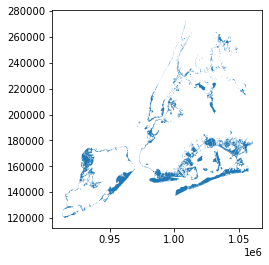

In [54]:
sandy_zone.plot()

In [55]:
subway_gdf = subway_gdf.to_crs(2263)
subway_gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [56]:
nyc_bb = nyc_bb.to_crs(2263)
nyc_bb.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Buffer Subway Points 10 Feet

In [57]:
subway_gdf['geom_buffer'] = subway_gdf.buffer(10)
subway_gdf.head()

,line,name,objectid,url,geometry,latitude,longitude,geom_buffer
0,2-5,Birchall Ave & Sagamore St at NW corner,1734.0,http://web.mta.info/nyct/service/,POINT (1020670.669 248679.991),40.849169,-73.868356,"POLYGON ((1020680.669 248679.991, 1020680.620 ..."
1,2-5,Birchall Ave & Sagamore St at NE corner,1735.0,http://web.mta.info/nyct/service/,POINT (1020710.254 248665.112),40.849128,-73.868213,"POLYGON ((1020720.254 248665.112, 1020720.205 ..."
2,2-5,Morris Park Ave & 180th St at NW corner,1736.0,http://web.mta.info/nyct/service/,POINT (1019251.986 245782.870),40.841223,-73.873499,"POLYGON ((1019261.986 245782.870, 1019261.938 ..."
3,2-5,Morris Park Ave & 180th St at NW corner,1737.0,http://web.mta.info/nyct/service/,POINT (1019419.818 245866.910),40.841453,-73.872892,"POLYGON ((1019429.818 245866.910, 1019429.770 ..."
4,2-5,Boston Rd & 178th St at SW corner,1738.0,http://web.mta.info/nyct/service/,POINT (1017557.722 245631.832),40.840815,-73.879623,"POLYGON ((1017567.722 245631.832, 1017567.674 ..."


<AxesSubplot:>

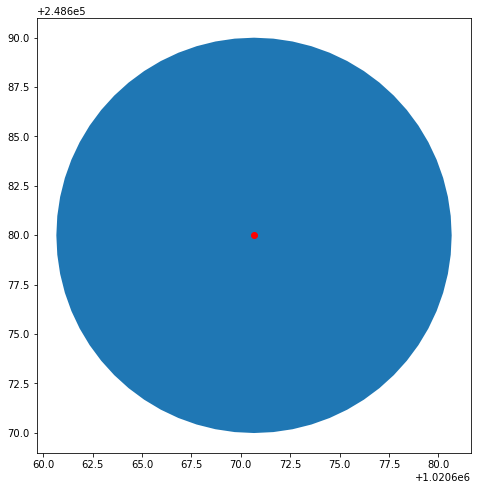

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))

subway_gdf.head(1).plot(ax=ax, facecolor='r')
subway_gdf.set_geometry('geom_buffer').head(1).plot(ax=ax, 
                                                    zorder=0)

In [59]:
subway_gdf = subway_gdf.set_geometry('geom_buffer')

subway_gdf.geometry.name

'geom_buffer'

In [60]:
subway_gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [61]:
subway_sandyzone = gpd.sjoin(subway_gdf, 
                             sandy_zone, 
                             how="inner", 
                             op='intersects')

subway_sandyzone.head()

,line,name,objectid,url,geometry,latitude,longitude,geom_buffer,index_right,comments,demsource,id,sourcedata,state,status,verified
98,R-1,None,1832.0,http://web.mta.info/nyct/service/,POINT (980604.146 195046.295),40.702033,-74.013149,"POLYGON ((980614.146 195046.295, 980614.098 19...",329,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes
99,R-1,None,1833.0,http://web.mta.info/nyct/service/,POINT (980604.146 195046.295),40.702033,-74.013149,"POLYGON ((980614.146 195046.295, 980614.098 19...",329,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes
100,R-1,None,1834.0,http://web.mta.info/nyct/service/,POINT (980535.378 195020.074),40.701961,-74.013397,"POLYGON ((980545.378 195020.074, 980545.330 19...",329,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes
101,R-1,None,1835.0,http://web.mta.info/nyct/service/,POINT (980535.378 195020.074),40.701961,-74.013397,"POLYGON ((980545.378 195020.074, 980545.330 19...",329,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes
419,1,Canal St & Varick St at NE corner,275.0,http://web.mta.info/nyct/service/,POINT (982564.703 202527.968),40.722569,-74.006080,"POLYGON ((982574.703 202527.968, 982574.655 20...",329,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes


In [62]:
subway_sandyzone.shape

(105, 16)

In [63]:
subway_sandyzone = subway_sandyzone.reset_index(drop=True)

subway_sandyzone.head()

,line,name,objectid,url,geometry,latitude,longitude,geom_buffer,index_right,comments,demsource,id,sourcedata,state,status,verified
0,R-1,None,1832.0,http://web.mta.info/nyct/service/,POINT (980604.146 195046.295),40.702033,-74.013149,"POLYGON ((980614.146 195046.295, 980614.098 19...",329,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes
1,R-1,None,1833.0,http://web.mta.info/nyct/service/,POINT (980604.146 195046.295),40.702033,-74.013149,"POLYGON ((980614.146 195046.295, 980614.098 19...",329,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes
2,R-1,None,1834.0,http://web.mta.info/nyct/service/,POINT (980535.378 195020.074),40.701961,-74.013397,"POLYGON ((980545.378 195020.074, 980545.330 19...",329,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes
3,R-1,None,1835.0,http://web.mta.info/nyct/service/,POINT (980535.378 195020.074),40.701961,-74.013397,"POLYGON ((980545.378 195020.074, 980545.330 19...",329,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes
4,1,Canal St & Varick St at NE corner,275.0,http://web.mta.info/nyct/service/,POINT (982564.703 202527.968),40.722569,-74.006080,"POLYGON ((982574.703 202527.968, 982574.655 20...",329,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes


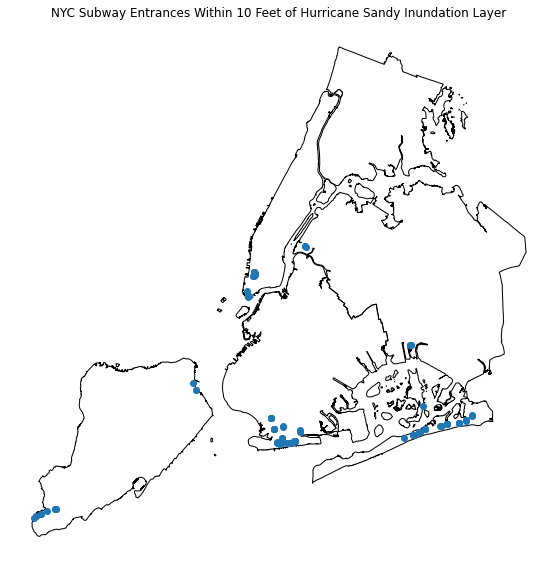

In [64]:
fig, ax = plt.subplots(figsize=(8, 8))

subway_sandyzone.set_geometry('geometry').plot(ax=ax)
nyc_bb.plot(ax=ax, 
            zorder=0, 
            facecolor='None', 
            edgecolor='black')

plt.axis('off')
plt.title('NYC Subway Entrances Within 10 Feet of Hurricane Sandy Inundation Layer')
plt.tight_layout()

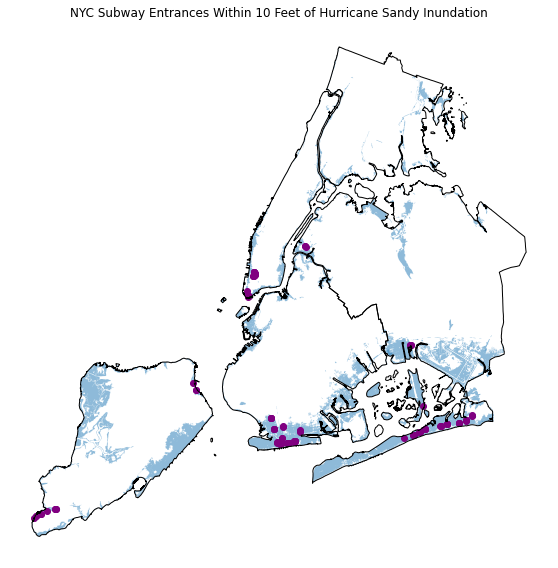

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))

subway_sandyzone.set_geometry('geometry').plot(ax=ax, color='purple')
nyc_bb.plot(ax=ax, 
            zorder=1, 
            facecolor='None', 
            edgecolor='black')

sandy_zone.plot(ax=ax, zorder=0, alpha=.5)

plt.axis('off')
plt.title('NYC Subway Entrances Within 10 Feet of Hurricane Sandy Inundation')
plt.tight_layout()

# Zoom Into Station

In [66]:
subway_sandyzone[['name', 'objectid']].head(20)

,name,objectid
0,None,1832.0
1,None,1833.0
2,None,1834.0
3,None,1835.0
4,Canal St & Varick St at NE corner,275.0
5,Canal St & Varick St at NE corner,276.0
6,West Broadway & Franklin St at SW corner,277.0
7,6th Ave & Walker St at NE corner,408.0
8,Lispenard St & West Broadway at NE corner,769.0
9,6th Ave & West Broadway at NW corner,770.0


In [67]:
sample_gdf = subway_sandyzone.loc[subway_sandyzone['objectid'] == 275]

sample_gdf.head()

,line,name,objectid,url,geometry,latitude,longitude,geom_buffer,index_right,comments,demsource,id,sourcedata,state,status,verified
4,1,Canal St & Varick St at NE corner,275.0,http://web.mta.info/nyct/service/,POINT (982564.703 202527.968),40.722569,-74.00608,"POLYGON ((982574.703 202527.968, 982574.655 20...",329,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes


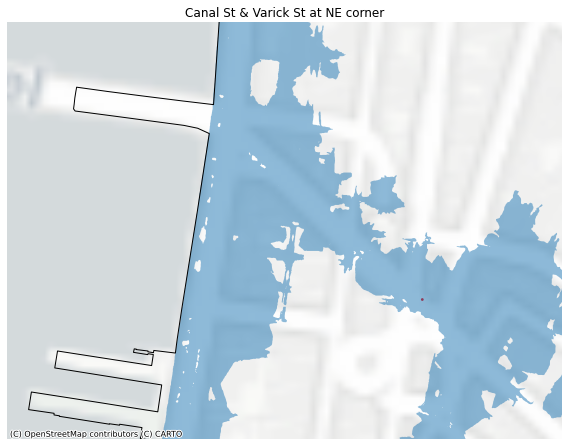

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))

sample_gdf.plot(ax=ax, 
                color='r')
sandy_zone.plot(ax=ax, 
                zorder=1, 
                alpha=.5)
nyc_bb.plot(zorder=2, 
            ax=ax, 
            facecolor='None', 
            edgecolor='black')
ctx.add_basemap(ax, zoom=13,
                zorder=0,
                crs=2263, 
                source=ctx.providers.CartoDB.Positron)

x_lower, y_lower, x_upper, y_upper = sample_gdf.head(1).total_bounds
ax.set_xlim([x_lower - 3000, x_upper + 1000])
ax.set_ylim([y_lower - 1000, y_upper + 2000])

plt.title('Canal St & Varick St at NE corner')
plt.axis('off')
plt.tight_layout()

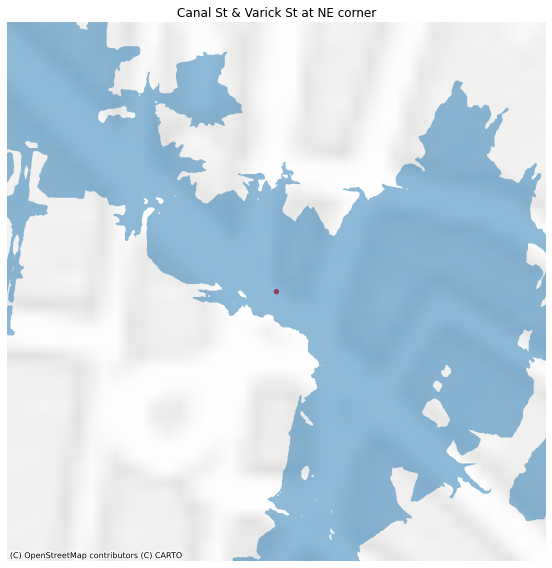

In [70]:
fig, ax = plt.subplots(figsize=(8, 8))

sample_gdf.plot(ax=ax, 
                color='r')
sandy_zone.plot(ax=ax, 
                zorder=1, 
                alpha=.5)
nyc_bb.plot(zorder=2, 
            ax=ax, 
            facecolor='None', 
            edgecolor='black')
ctx.add_basemap(ax, zoom=13,
                zorder=0,
                crs=2263, 
                source=ctx.providers.CartoDB.Positron)

x_lower, y_lower, x_upper, y_upper = sample_gdf.head(1).total_bounds
ax.set_xlim([x_lower - 1000, x_upper + 1000])
ax.set_ylim([y_lower - 1000, y_upper + 1000])

plt.title('Canal St & Varick St at NE corner')
plt.axis('off')
plt.tight_layout()